In [2]:
#Q1. IMPORT THE NECESSARY LIBRARIES

import numpy as np     #To perform array operations
import pandas as pd    #To read the dataframe and perform other dataframe-related operations
import seaborn as sns  #For the graph plotting
import scipy.stats as stats  #To perform the statistical tests

In [26]:
#Q2. READ THE DATA AS A DATAFRAME   
insurance_data = pd.read_csv('insurance.csv')  
print(insurance_data.head())

['southwest' 'southeast' 'northwest' 'northeast']


In [4]:
#Q3a. PRINT THE SHAPE OF THE DATA

print("Shape of the data: ", insurance_data.shape) 

Shape of the data:  (1338, 7)


In [5]:
#Q3b. PRINT THE DATATYPE OF EACH ATTRIBUTE

print("The datatype of each column is: ", insurance_data.dtypes) 

The datatype of each column is:  age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
#Q3c. CHECK THE PRESENCE OF MISSING VALUES

#To check only presence of missing values, use any() instead of sum()
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
#Q3d. 5 POINT SUMMARY OF NUMERICAL ATTRIBUTES

def fivepoint(arr,name):
    quartiles = np.percentile(arr, [0,25,50,75,100])
    print("The five number summary for",name," is:\r")
    print(*quartiles,sep="\n")
    print()
    
fivepoint(insurance_data['age'],'age')
fivepoint(insurance_data['bmi'],'bmi')
fivepoint(insurance_data['children'],'children')
fivepoint(insurance_data['charges'],'charges')

The five number summary for age  is:
18.0
27.0
39.0
51.0
64.0

The five number summary for bmi  is:
15.96
26.29625
30.4
34.69375
53.13

The five number summary for children  is:
0.0
0.0
1.0
2.0
5.0

The five number summary for charges  is:
1121.8739
4740.28715
9382.033
16639.912515
63770.42801



[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001802D693128>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001803205D400>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001803208AA90>]]


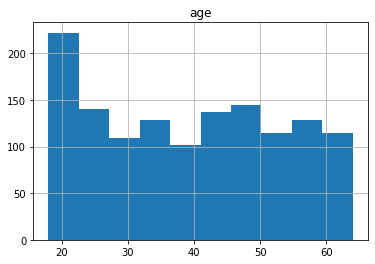

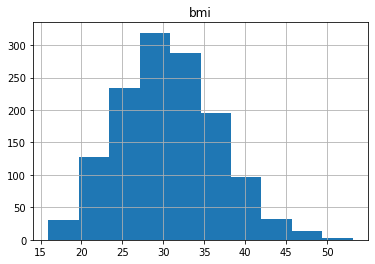

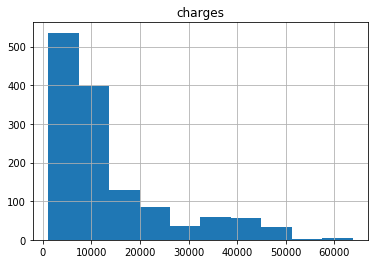

In [8]:
#Q3e. DISTRIBUTION OF 'bmi', 'age', AND 'charges' COLUMNS

#The distributions can be visualized using histograms
#The hist() function of pandas library is used to plot the histogram
print(insurance_data.hist('age'))
print(insurance_data.hist('bmi'))
print(insurance_data.hist('charges'))

In [9]:
#Q3f. MEASURE OF SKEWNESS FOR 'bmi', 'age', AND 'charges' COLUMNS

#The skew values can be obtained using the dataframe.skew() function of pandas
skewValues = insurance_data.skew(axis=0)
print("Skew of age:",skewValues[0])
print("Skew of bmi:",skewValues[1])
print("Skew of charges:",skewValues[3])

Skew of age: 0.05567251565299186
Skew of bmi: 0.2840471105987448
Skew of charges: 1.5158796580240388


In [29]:
#Q3g. CHECK THE PRESENCE OF OUTLIERS IN 'bmi', 'age', AND 'charges' COLUMNS

#The rule used is that outliers are either >= Q3+IQR*1.5 or <=Q1-IQR*1.5
def outlier(arr,name):
    Q1 = insurance_data[name].quantile(0.25)
    Q3 = insurance_data[name].quantile(0.75)
    IQR = (Q3-Q1)
    c = 0
    for i in arr:
        if i<=Q1-(1.5*IQR) or i>=Q3+(1.5*IQR):
            c += 1
    return c

print("Outliers for age:", outlier(insurance_data['age'],'age'))
print("Outliers for bmi:", outlier(insurance_data['bmi'],'bmi'))
print("Outliers for charges:", outlier(insurance_data['charges'],'charges'))

Outliers for age: 0
Outliers for bmi: 9
Outliers for charges: 139


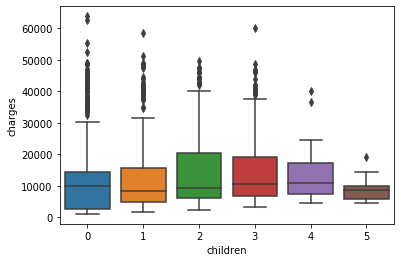

In [11]:
#Q3h. FIND DISTRIBUTION OF CATEGORICAL COLUMNS (INCLUDE 'children')

#The distributions can be obtained using sns.boxplot()
#Since data given is insurance data, we are getting the distribution against 'charges' (insurance charges) column
#The categorical columns are: sex, smoker, region
#Including boxplot for 'children' column as asked in the question
#Distribution of 'children' column against 'charges'
sns.boxplot(x = 'children', y = 'charges', data = insurance_data)

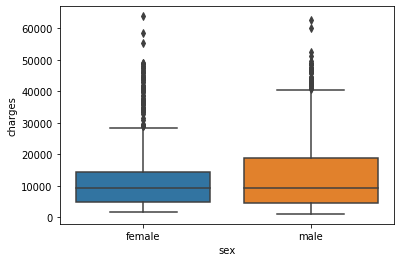

In [12]:
#Q3h contd.

#Distribution of column 'sex' against 'charges'
sns.boxplot(x = 'sex',y = 'charges', data = insurance_data)

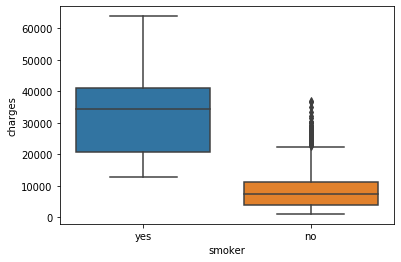

In [13]:
#Q3h contd.

#Distribution for 'smoker' column against 'charges'
sns.boxplot(x = 'smoker', y = 'charges', data = insurance_data)

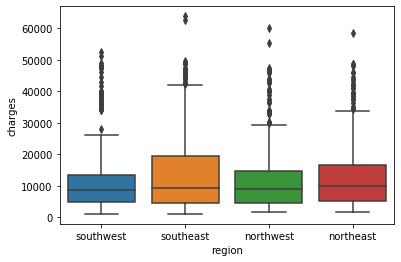

In [14]:
#Q3h contd.

#Distribution for 'region' column against 'charges'
sns.boxplot(x = 'region', y = 'charges', data = insurance_data)

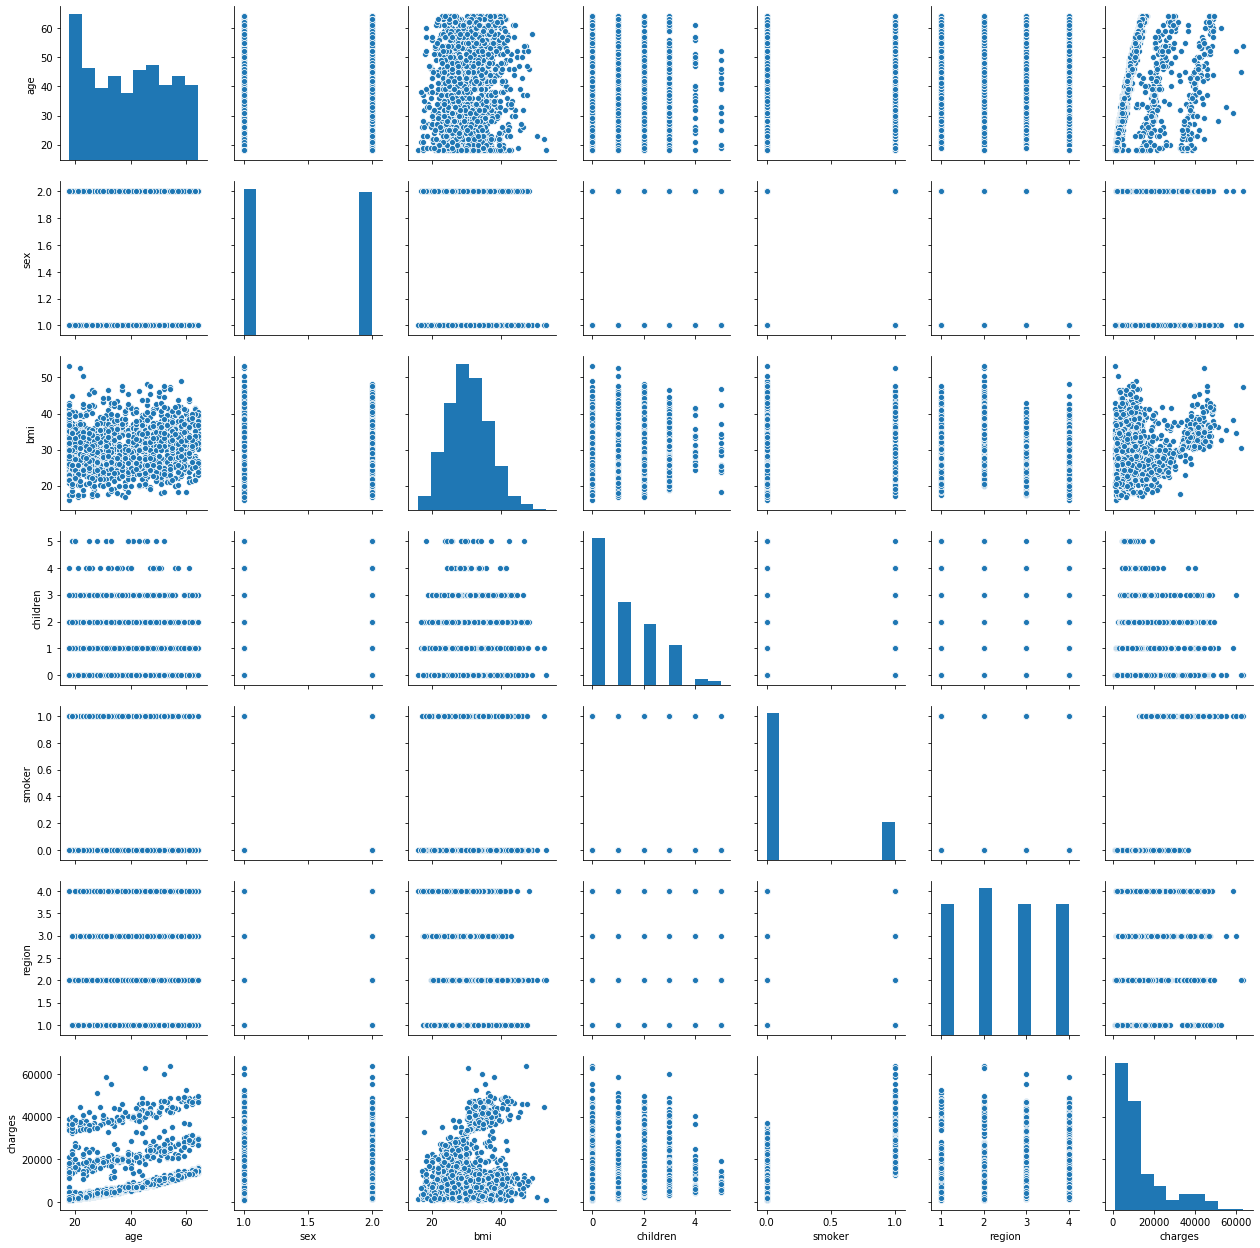

In [27]:
#Q3i. PAIRPLOT THAT INCLUDES ALL THE COLUMNS IN THE DATAFRAME

#Function used: sns.pairplot()
insurance_data_copy = pd.read_csv('insurance.csv')

#Replace categorical variables with numeric values
insurance_data_copy['sex'] = insurance_data_copy['sex'].replace({'male':1,'female':2})
insurance_data_copy['smoker'] = insurance_data_copy['smoker'].replace({'yes':1, 'no':0})
insurance_data_copy['region'] = insurance_data_copy['region'].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
sns.pairplot(insurance_data_copy)

In [16]:
#Q4a: DO THE CHARGES OF SMOKERS DIFFER SIGNIFICANTLY FROM THAT OF NON SMOKERS?

#To check this we perform a t-test using the smokers' and non-smokers' data

#Step 1: Fix the null and alternate hypotheses
#H0(null hypothesis): The charges of smokers and non smokers are same
#H1(alt hypothesis): The charges of smokers and non smokers are not same

#Step 2: Fix the confidence level(alpha). The default value i.e. 0.05 is taken

alpha = 0.05

#Step 3: Get the charges data for smokers and non smokers
x = np.array(insurance_data[insurance_data.smoker == 'yes'].charges)
y = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

#Step 4: Perform a t-test using the extracted data
t_statistic, p_value = stats.ttest_ind(x,y,axis = 0)

#Step 5: The default confidence level is 0.05. If p_value <0.05, H0 is rejected.
print(p_value < alpha)   #The answer is true, which implies p_value < 0.05

#HENCE IT CAN BE CONCLUDED THAT THERE IS A SIGNIFICANT DIFFERENCE IN THE CHARGES
#OF SMOKERS AND NON SMOKERS.

print("Yes. According to data insights gained from an independent T-test, it can be concluded that there is a significant difference between the charges of smokers and non smokers")

True
Yes. According to data insights gained from an independent T-test, it can be concluded that there is a significant difference between the charges of smokers and non smokers


In [17]:
#Q4b. DOES THE BMI OF MALES DIFFER SIGNIFICANTLY FROM THAT OF FEMALES?

#For this too, an independent t-test is performed to reach a conclusion

#Step 1: Fix the null and alternate hypotheses
#H0: There is no significant difference in the BMI of males and females
#H1: There is a significant difference in the BMI of males and females

#Step 2: Fix the value of alpha. Since it is not specified, the default value is assumed
alpha = 0.05

#Step 3: Extract the required data from the dataframe
x = np.array(insurance_data[insurance_data.sex == 'male'].bmi)
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi)

#Step 4: Perform the t-test
t_statistic, p_value = stats.ttest_ind(x,y,axis=0)

#Step 5: Check if p_value < alpha. If it is, null hypothesis is rejected
print(p_value < alpha)  #false => H0 is accepted

#SINCE p_value>alpha, IT CAN BE CONCLUDED THAT THERE IS NO SIGNIFICANT DIFFERENCE IN THE BMI OF MALES AND FEMALES
#i.e. GENDER HAS NO IMPACT ON BMI
print("Gender has no impact on BMI")

False
Gender has no impact on BMI


In [18]:
#Q4c. IS THE PROPORTION OF SMOKERS SIGNIFICANTLY DIFFERENT IN DIFFERENT GENDERS?

#To determine this we perform a chi-squared test.

#Step 1: Fix the null and alternate hypotheses
#H0: There is no significant difference in smokers' proportion among genders
#H1: There is a significant difference in smokers' proportion among genders

#Step 2: Fix the confidence level(alpha). The default value of 0.05 is used
alpha = 0.05

#Step 3: For the chi square test, a frequency distribution of the variables is required
#This can be generate using pd.crosstab, that returns a cross-tabulation/contingency table
freq_dist = pd.crosstab(insurance_data['smoker'], insurance_data['sex'])
print(freq_dist)

#Step 4: Perform the chi square test using the stats.chi2_contingency() method
chiSquared, pValue, degOfFreedom, expectedValue = stats.chi2_contingency(freq_dist)

print(chiSquared)
#Step 5: The critical value in the chi square table for dof = 1 and alpha=0.05 is 3.841
#Since obtained chi square value is greater than critical value, H0 is rejected
#HENCE IT CAN BE CONCLUDED THAT SMOKERS' PROPORTION DIFFERS WITH GENDER

print("The proportion of smokers differs significantly among different genders")

sex     female  male
smoker              
no         547   517
yes        115   159
7.39291081459996
The proportion of smokers differs significantly among different genders


In [19]:
#Q4d. IS THE BMI DISTRIBUTION AMONG WOMEN WITH 0,1,AND 2 CHILDREN SAME OR DIFFERENT?

#To determine this we perform an ANOVA test

#Step 1: Fix the null and alternate hypotheses
#H0: No of children does not affect the BMI
#H1: No of children affects the BMI

#Step 2: Fix the alpha value as the default value
alpha = 0.05

#Step 3: Extract the data
data = insurance_data[insurance_data['sex'] == 'female']
noChild = data[data['children'] == 0]['bmi']
oneChild = data[data['children'] == 1]['bmi']
twoChildren = data[data['children'] == 2]['bmi']

#Step 4: Perform the ANOVA test
fStat, pValue = stats.f_oneway(noChild, oneChild, twoChildren) 
fStat

#The critical value for degree of freedom 2 is 19.00
#fStat < 19 => The null hypothesis is accepted 
#THE NUMBER OF CHILDREN DOES NOT HAVE ANY EFFECT ON THE BMI
print("There is no relationship between the BMI of a female and the number of children she has")

There is no relationship between the BMI of a female and the number of children she has
